In [7]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

import warnings
warnings.filterwarnings('ignore')

In [8]:
train_path = "C:\\Users\\Nikita Sharma\\Downloads\\Waste dataset\\Train"
test_path = "C:\\Users\\Nikita Sharma\\Downloads\\Waste dataset\\TEST"

In [9]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [10]:
x_data = [] 
y_data = [] 

for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array) 
        y_data.append(category.split("/")[-1])
        
data=pd.DataFrame({'image': x_data,'label': y_data})

100%|██████████| 11160/11160 [00:28<00:00, 391.56it/s]


In [11]:
data.shape

(22320, 2)

In [12]:
from collections import Counter
Counter(y_data)

Counter({'C:\\Users\\Nikita Sharma\\Downloads\\Waste dataset\\Train\\Biodegradable': 11160,
         'C:\\Users\\Nikita Sharma\\Downloads\\Waste dataset\\Train\\Recyclable': 11160})

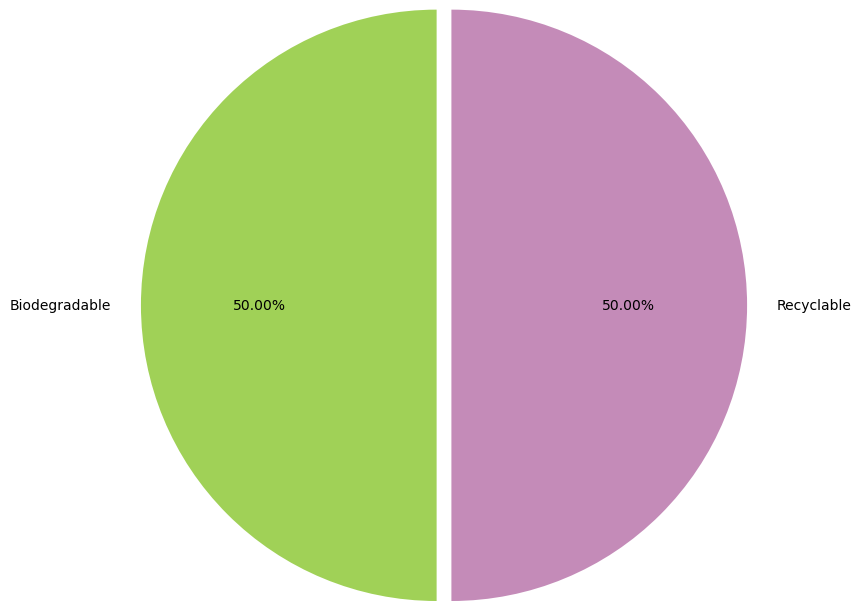

In [13]:
colors = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05],autopct='%0.2f%%',
        labels=['Biodegradable', 'Recyclable'], colors= colors,radius=2)
plt.show()

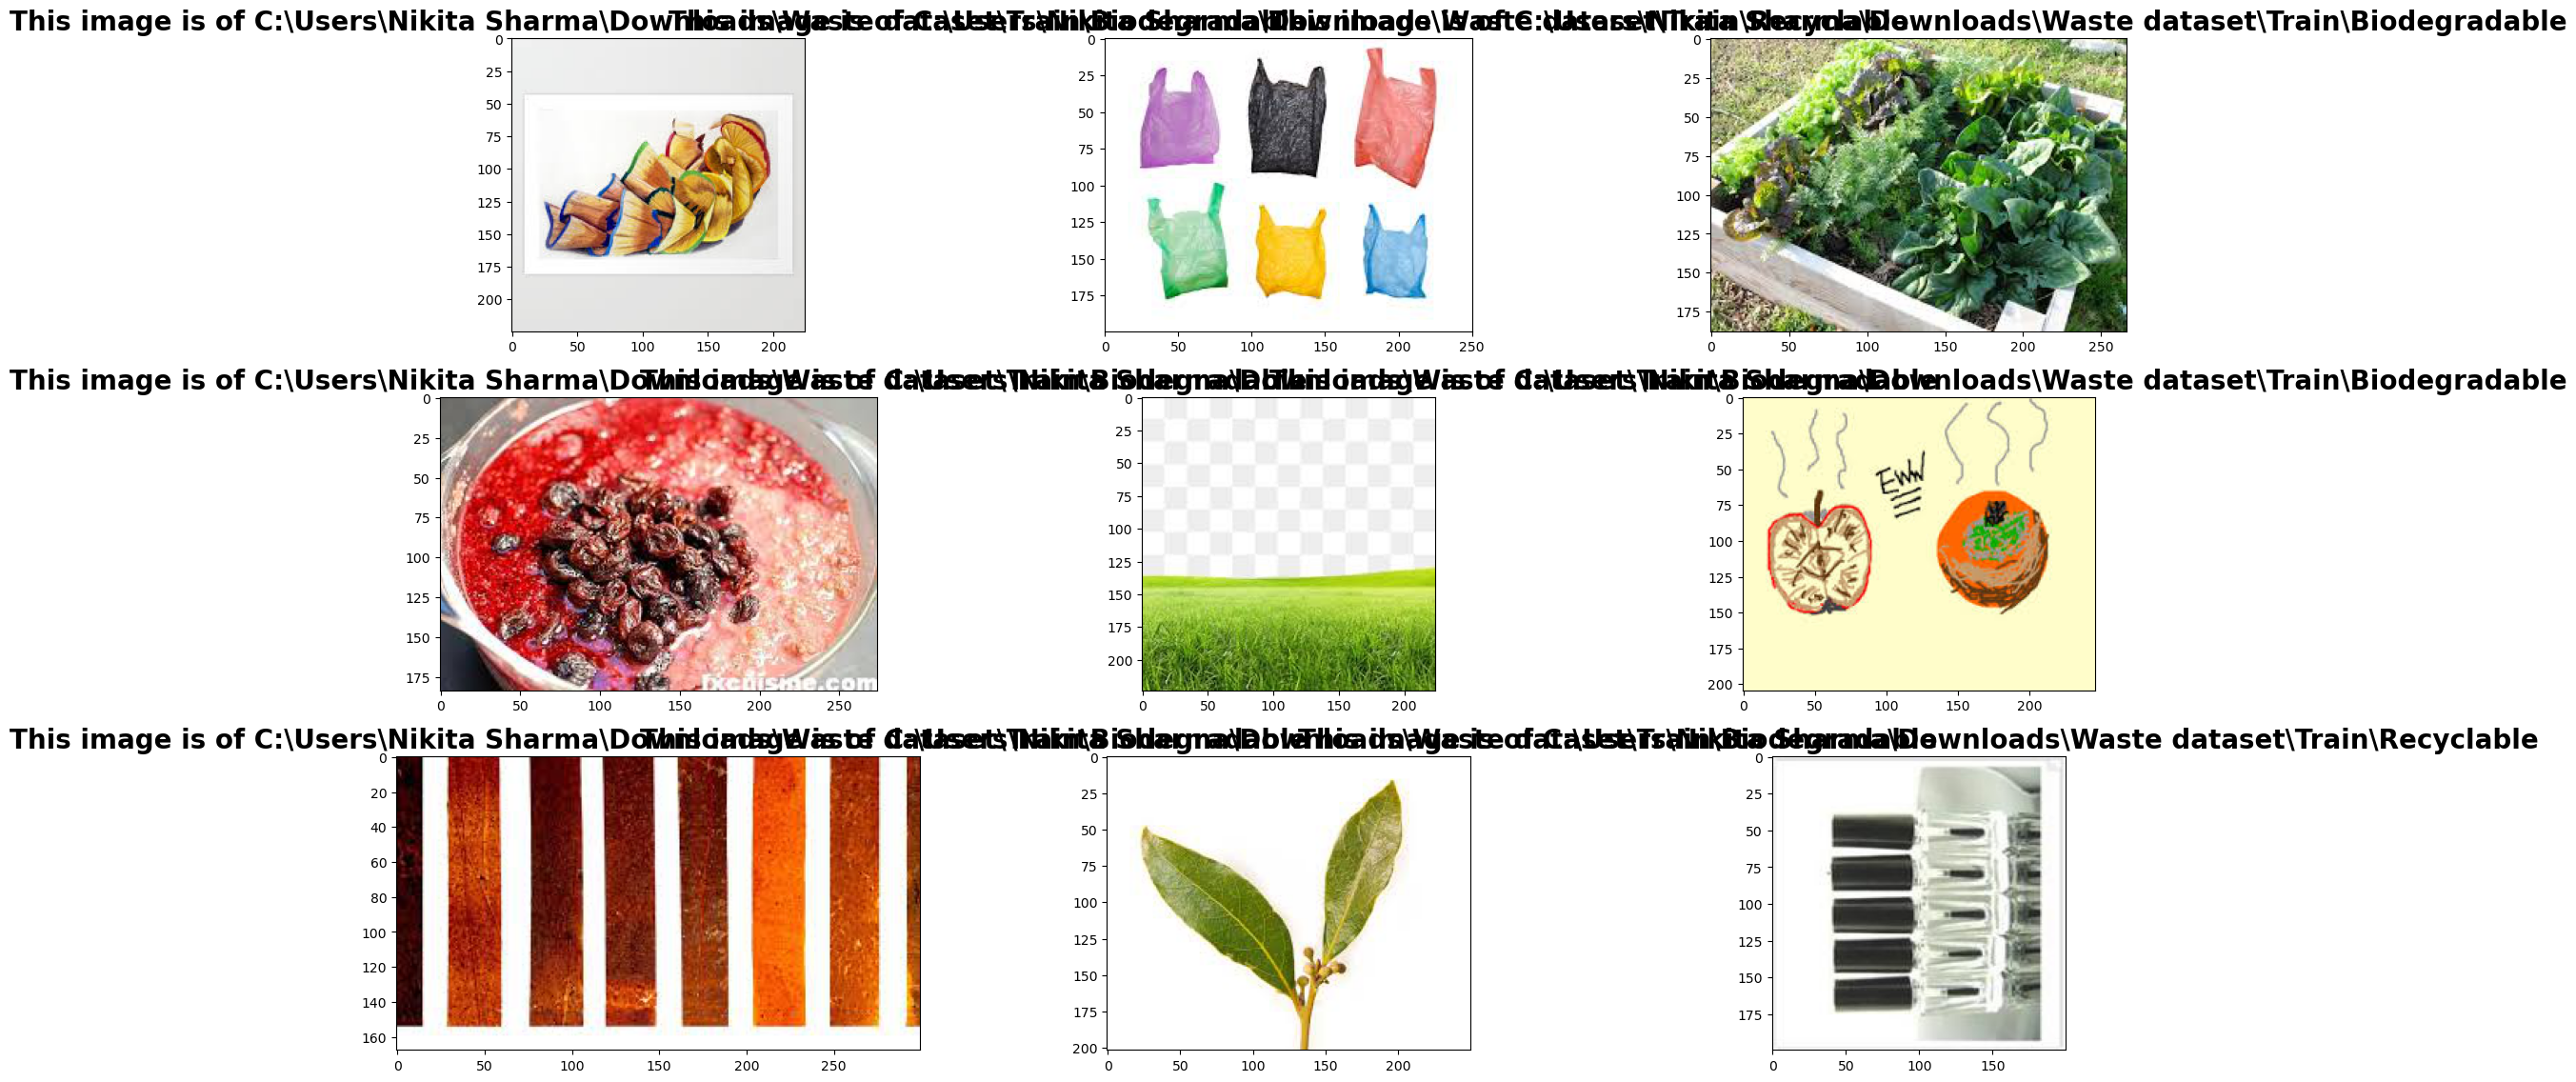

In [14]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(15000)
    plt.title('This image is of {0}'.format(data.label[index]),fontdict={'size':20,'weight':'bold'})
    plt.imshow(data.image[index])
    plt.tight_layout()

In [15]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  2


In [20]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from keras.models import Model


In [31]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the function to create the Sequential model
def create_sequential_model():
    model = Sequential()
    model.add(Conv2D(32,(3,3),input_shape = (224,224,3)))
    model.add(Activation("relu"))
    model.add(MaxPooling2D())

    model.add(Conv2D(64,(3,3)))  
    model.add(Activation("relu"))
    model.add(MaxPooling2D())

    model.add(Conv2D(128,(3,3)))
    model.add(Activation("relu"))
    model.add(MaxPooling2D())

    model.add(Flatten())
    model.add(Dense(256))
    model.add(Activation("relu"))
    model.add(Dropout(0.5))
    model.add(Dense(64))
    model.add(Activation("relu"))
    model.add(Dropout(0.5))
    model.add(Dense(numberOfClass)) # output
    model.add(Activation("sigmoid"))

    model.compile(loss = "binary_crossentropy",
                  optimizer = "adam",
                  metrics = ["accuracy"])
    
    return model

# Define paths and parameters
train_path = "C:\\Users\\Nikita Sharma\\Downloads\\Waste dataset\\Train"
test_path = "C:\\Users\\Nikita Sharma\\Downloads\\Waste dataset\\Test"
batch_size = 256

# Create data generators
train_datagen = ImageDataGenerator(rescale= 1./255)
test_datagen = ImageDataGenerator(rescale= 1./255)
train_generator = train_datagen.flow_from_directory(
        train_path, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_path, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

# Create the model
model = create_sequential_model()

# Train the model
hist = model.fit(
        train_generator,
        epochs=10,
        validation_data=test_generator)


Found 22320 images belonging to 2 classes.
Found 5582 images belonging to 2 classes.
Epoch 1/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 2636s 30s/step - accuracy: 0.6704 - loss: 0.7593 - val_accuracy: 0.8366 - val_loss: 0.3813
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 2300s 26s/step - accuracy: 0.8144 - loss: 0.4420 - val_accuracy: 0.8424 - val_loss: 0.3621
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 2298s 26s/step - accuracy: 0.8388 - loss: 0.3944 - val_accuracy: 0.8379 - val_loss: 0.3685
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 2225s 25s/step - accuracy: 0.8445 - loss: 0.3761 - val_accuracy: 0.8647 - val_loss: 0.3302
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 2216s 25s/step - accuracy: 0.8687 - loss: 0.3257 - val_accuracy: 0.8707 - val_loss: 0.3292
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 2254s 26s/step - accuracy: 0.8736 - loss: 0.3208 - val_accuracy: 0.8370 - val_loss: 0.3783
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 2935s 33s/step - accuracy: 0.8900 - loss: 0.2790 - val_accuracy: 0.8759 - val_loss: 0.3107
Epoch 8/10
8

In [32]:
# Evaluate model performance
evaluation = model.evaluate(test_generator)
print("Test Accuracy:", evaluation[1])
print("Test Loss:", evaluation[0])


22/22 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - accuracy: 0.8713 - loss: 0.3731
Test Accuracy: 0.8763883709907532
Test Loss: 0.35634076595306396


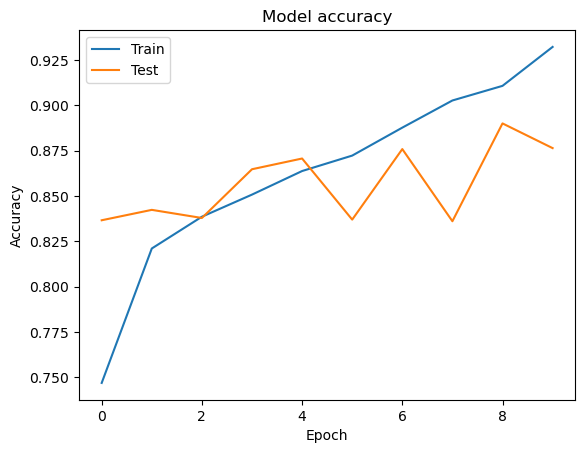

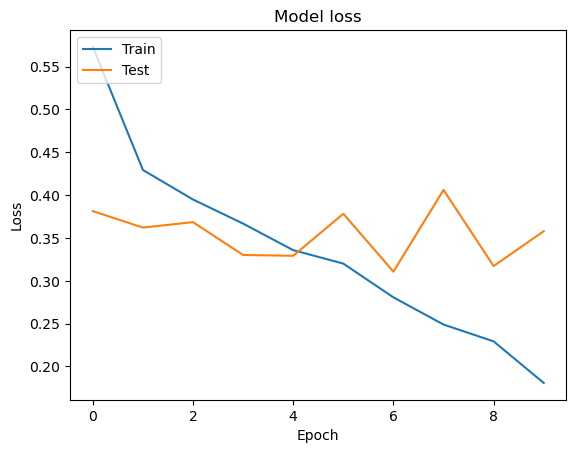

In [33]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [35]:
# Save the model in native Keras format
model.save("classification_CNN.keras")


In [36]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Get the predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get the true labels
true_classes = test_generator.classes

# Generate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:")
print(cm)


22/22 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step
Confusion Matrix:
[[1602 1189]
 [1571 1220]]


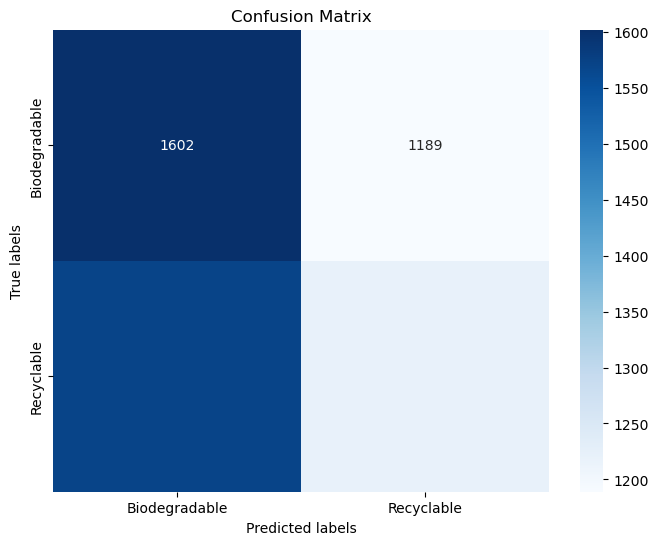

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the class labels
class_names = list(test_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


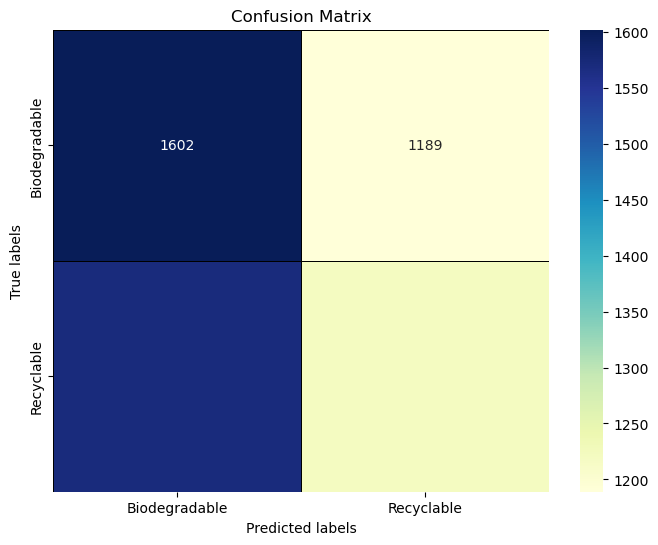

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5, linecolor='black', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


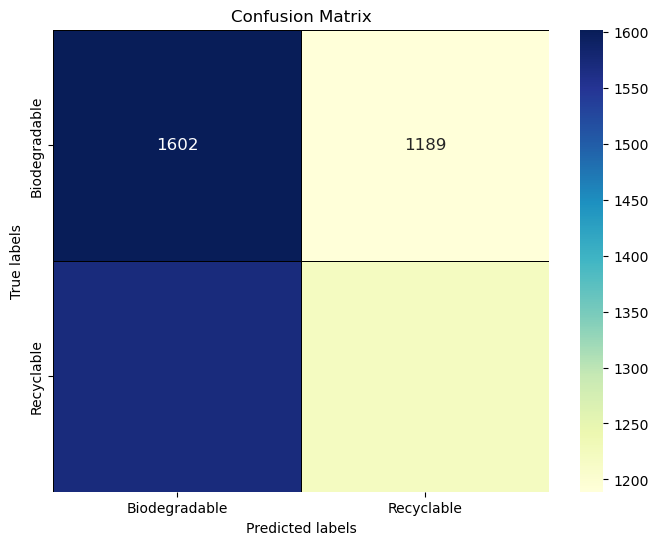

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5, linecolor='black', xticklabels=class_names, yticklabels=class_names, annot_kws={"size": 12})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


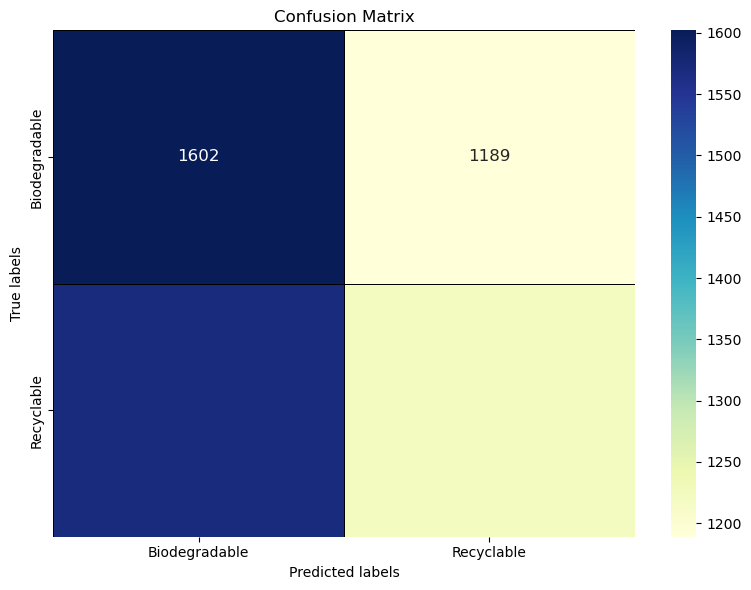

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5, linecolor='black', xticklabels=class_names, yticklabels=class_names, annot_kws={"size": 12})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.tight_layout()  # Ensures all parts of the plot are visible
plt.show()


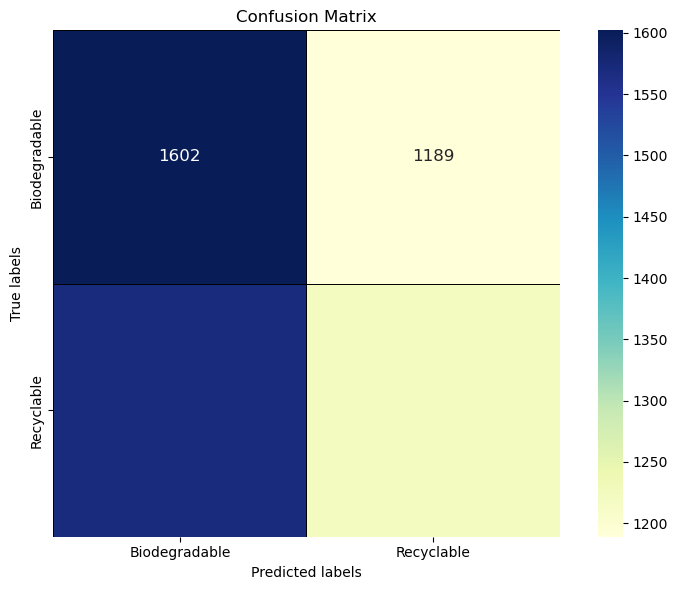

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5, linecolor='black', xticklabels=class_names, yticklabels=class_names, annot_kws={"size": 12}, square=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.tight_layout()  # Ensures all parts of the plot are visible
plt.show()


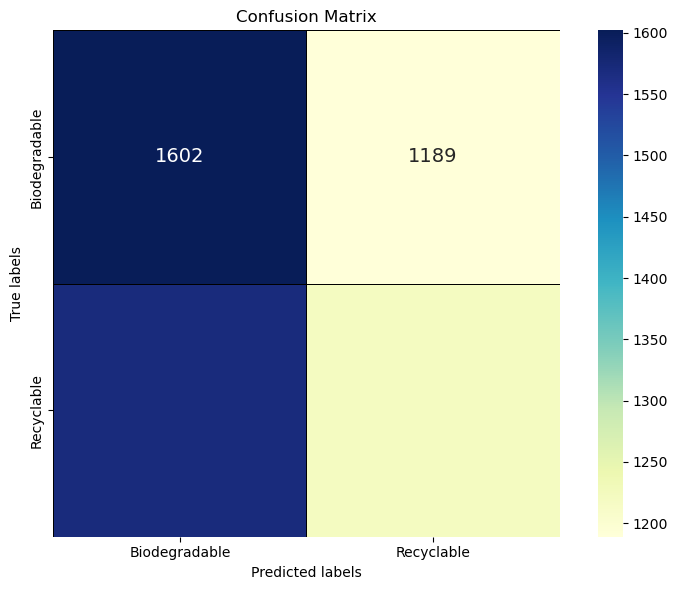

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5, linecolor='black', xticklabels=class_names, yticklabels=class_names, annot_kws={"size": 14}, square=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.tight_layout()  # Ensures all parts of the plot are visible
plt.show()


In [43]:
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[1602 1189]
 [1571 1220]]


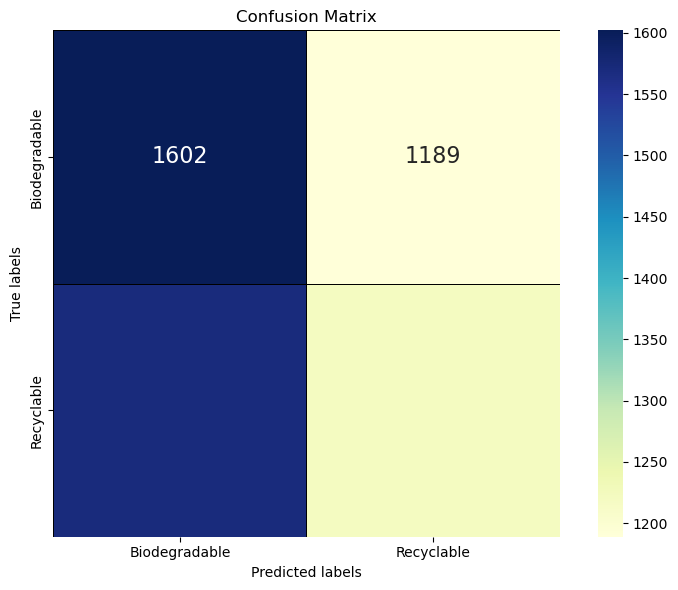

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5, linecolor='black', xticklabels=class_names, yticklabels=class_names, annot_kws={"size": 16}, square=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.tight_layout()  # Ensures all parts of the plot are visible
plt.show()


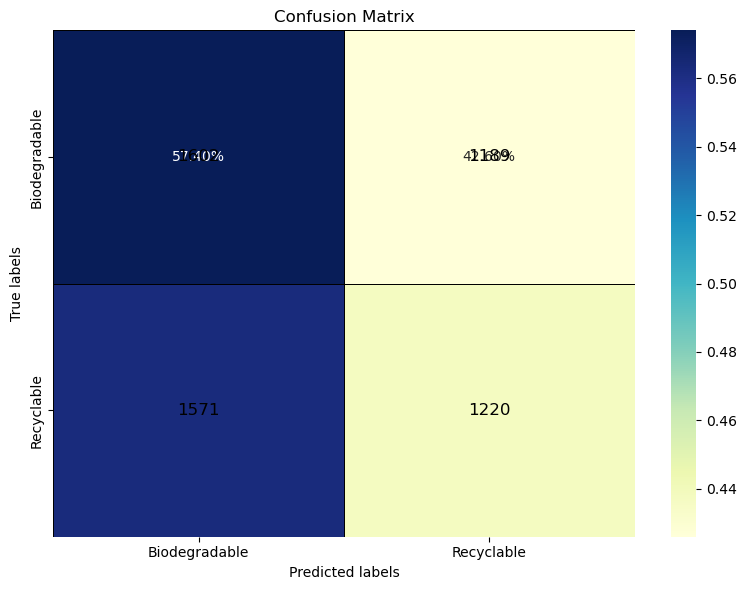

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))

# Normalize the confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot heatmap
sns.heatmap(cm_norm, annot=True, cmap='YlGnBu', fmt='.2%', linewidths=0.5, linecolor='black', xticklabels=class_names, yticklabels=class_names)

# Add text annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j + 0.5, i + 0.5, '{:.0f}'.format(cm[i, j]), ha='center', va='center', color='black', fontsize=12)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


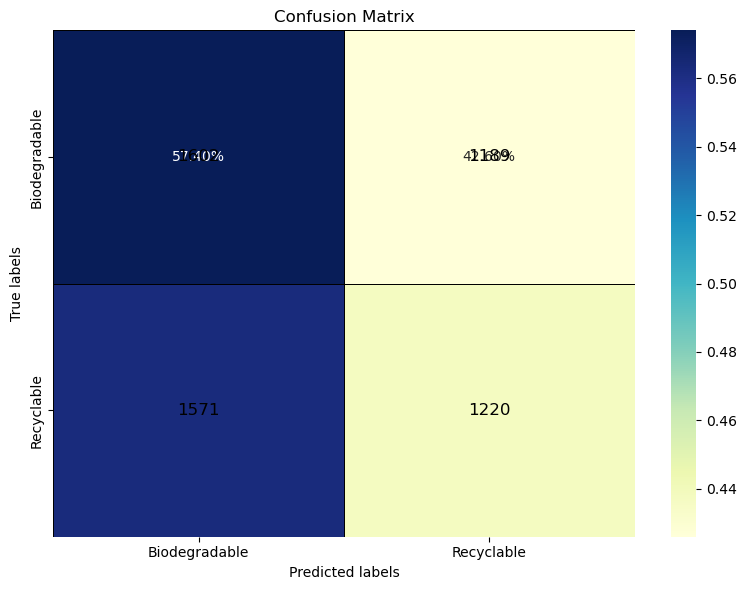

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))

# Normalize the confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot heatmap
sns.heatmap(cm_norm, annot=True, cmap='YlGnBu', fmt='.2%', linewidths=0.5, linecolor='black', xticklabels=class_names, yticklabels=class_names)

# Add text annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        if cm[i, j] != 0:
            plt.text(j + 0.5, i + 0.5, '{:.0f}'.format(cm[i, j]), ha='center', va='center', color='black', fontsize=12)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


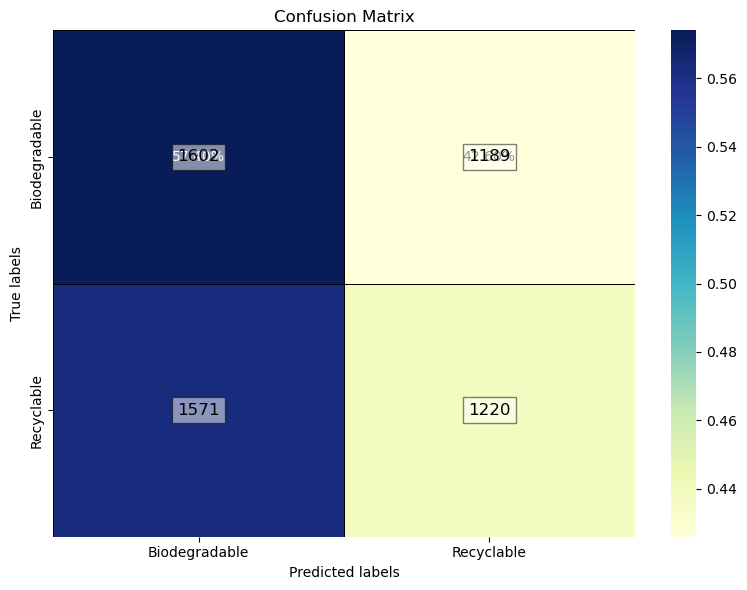

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))

# Normalize the confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot heatmap
sns.heatmap(cm_norm, annot=True, cmap='YlGnBu', fmt='.2%', linewidths=0.5, linecolor='black', xticklabels=class_names, yticklabels=class_names)

# Add text annotations with adjusted positioning
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        if cm[i, j] != 0:
            plt.text(j + 0.5, i + 0.5, '{:.0f}'.format(cm[i, j]), ha='center', va='center', color='black', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


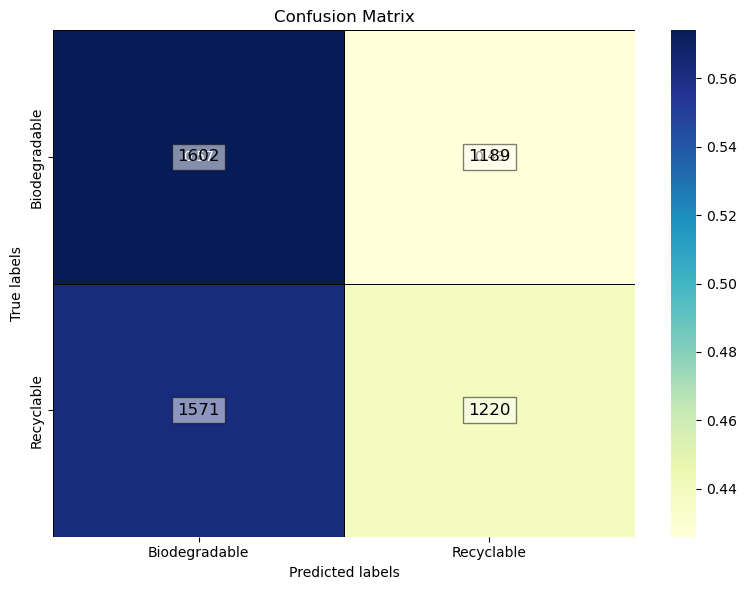

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))

# Normalize the confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot heatmap
sns.heatmap(cm_norm, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5, linecolor='black', xticklabels=class_names, yticklabels=class_names)

# Add text annotations with adjusted positioning
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        if cm[i, j] != 0:
            plt.text(j + 0.5, i + 0.5, '{:.0f}'.format(cm[i, j]), ha='center', va='center', color='black', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()



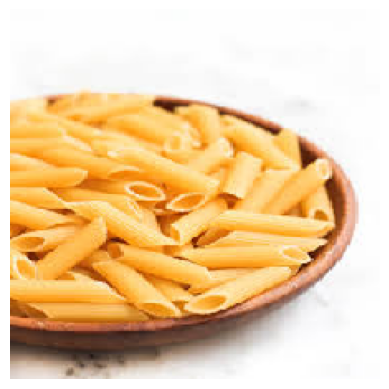

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
Predicted class: Biodegradable


In [53]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

# Load an image for prediction
img_path = 'C:\\Users\\Nikita Sharma\\Downloads\\classification\\DATASET\\TEST\\O\\O_11380.jpg'  # Replace 'path_to_your_image.jpg' with the path to your image file
img = image.load_img(img_path, target_size=(224, 224))  # Resize the image to match the input size of your model
img_array = image.img_to_array(img)  # Convert the image to a numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension
img_array /= 255.0  # Normalize the pixel values (assuming your model was trained with pixel values scaled between 0 and 1)

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Make predictions
predictions = model.predict(img_array)

# Assuming you have binary classification, you can extract the predicted class
predicted_class = "Recyclable" if predictions[0][0] < 0.5 else "Biodegradable"
print("Predicted class:", predicted_class)


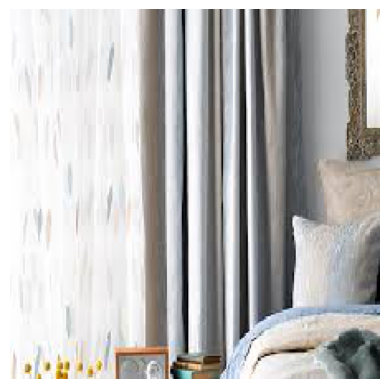

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Predicted class: Recyclable


In [54]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

# Load an image for prediction
img_path = 'C:\\Users\\Nikita Sharma\\Downloads\\classification\\DATASET\\TEST\\R\\R_11380.jpg'  # Replace 'path_to_your_image.jpg' with the path to your image file
img = image.load_img(img_path, target_size=(224, 224))  # Resize the image to match the input size of your model
img_array = image.img_to_array(img)  # Convert the image to a numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension
img_array /= 255.0  # Normalize the pixel values (assuming your model was trained with pixel values scaled between 0 and 1)

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Make predictions
predictions = model.predict(img_array)

# Assuming you have binary classification, you can extract the predicted class
predicted_class = "Recyclable" if predictions[0][0] < 0.5 else "Biodegradable"
print("Predicted class:", predicted_class)

In [61]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to your test data directory
test_data_dir = 'C:\\Users\\Nikita Sharma\\Downloads\\Waste dataset\\TEST'

# Create an ImageDataGenerator for test data
test_datagen = ImageDataGenerator(rescale=1./255)  # Normalize pixel values

# Batch size for evaluation
batch_size = 32

# Load test data from the directory
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Extract test images and labels from the generator
test_images, test_labels = next(test_generator)


Found 5582 images belonging to 2 classes.


In [62]:
import numpy as np
from sklearn.metrics import f1_score

# Assuming you have your model and test data already defined
# model = ... (your trained CNN model)
# test_images = ... (your test images)
# test_labels = ... (corresponding test labels)

# Make predictions on test data
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate F1 score
f1 = f1_score(np.argmax(test_labels, axis=1), predicted_labels, average='weighted')

print("F1 Score:", f1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step
F1 Score: 0.967741935483871


In [63]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Define paths to your test data directory
test_data_dir = 'C:\\Users\\Nikita Sharma\\Downloads\\Waste dataset\\TEST'

# Create an ImageDataGenerator for test data
test_datagen = ImageDataGenerator(rescale=1./255)  # Normalize pixel values

# Batch size for evaluation
batch_size = 32

# Target height and width of images
img_height = 224  # Replace with the actual height of your images
img_width = 224   # Replace with the actual width of your images

# Load test data from the directory
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Evaluate the model on test data
loss, accuracy = model.evaluate(test_generator)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Get true labels
true_labels = test_generator.classes

# Make predictions
predictions = model.predict(test_generator)

# Get predicted labels
predicted_labels = (predictions > 0.5).astype(int)

# Get class names
class_names = list(test_generator.class_indices.keys())

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=class_names))

# Plot confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(true_labels, predictions[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Calculate precision-recall curve and AUC
precision, recall, _ = precision_recall_curve(true_labels, predictions[:,1])
pr_auc = auc(recall, precision)

plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


Found 5582 images belonging to 2 classes.
175/175 ━━━━━━━━━━━━━━━━━━━━ 60s 339ms/step - accuracy: 0.9207 - loss: 0.2421
Test Loss: 0.35761961340904236
Test Accuracy: 0.8763883709907532
175/175 ━━━━━━━━━━━━━━━━━━━━ 55s 314ms/step
Classification Report:


ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets